In [ ]:
Ultrasound Lab report
Sahil Dhankhad (0674692)
Team 2

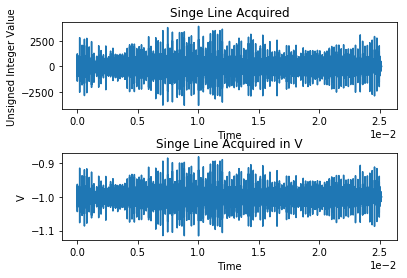

In [3]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert
#we use a simple open command for the file (basic Python)
f = open('LabRFdata.dat','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Line = np.fromfile(f,count=-1,dtype=np.int16)
L=len(Line)
f.close() #close the file
#we will now populate an array for the time which we now is 1/125MHz step for a total of 15000
x=np.arange(0,L/20.83e6,1/20.83e6)  #start,stop,step
#now we plot only the first line acquired (15000 samples)
plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(x,Line[:L])
plt.title('Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#But this is in integers, in volts we need to calculate 2Vpp -> 65535=1V and 0=-1V
LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
plt.subplot(212)
plt.plot(x,LineF[:L])
plt.title('Singe Line Acquired in V')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


262144
The maximum is 43.189881 and it is found at index 125312 which is the frequency 4.978655e+06


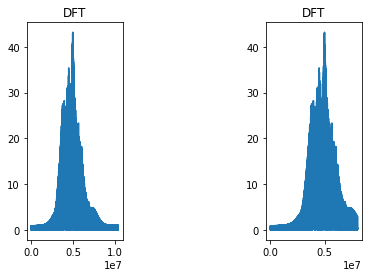

In [2]:
#Eliminating dc
LineF-=np.mean(LineF)
#Now let's obtain the spectrum
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,20.83e6/2,20.83e6/L)
Y=np.fft.fft(LineF)
Pyy=abs(Y)
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
#preparing the plotting
plt.subplots_adjust( wspace = 1.5 )
plt.subplot(121)
L2=len(Pyy)/2
print(L2)
plt.plot(f[:262144], Pyy[:262144])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Zooming into just less than 8MHz
inx=np.where(f>8e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Let's obtain the frequency at which the maximum is observed
#Remember we have a DFT which is mirrored, so we only work with half
PyyM=Pyy[:262144]
mm=np.argmax(PyyM) #this gives the index where the max is found
print("The maximum is %f and it is found at index %d which is the frequency %e" % (max(PyyM),mm,f[mm]))

We can see that the frequency of that transducer is $4.98MHz$ and as you can see, using the DFT gave us more precision than estimation.

the lenth of the signal array is:524288


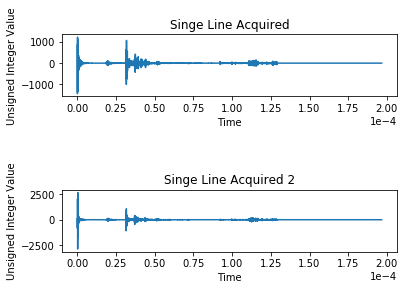

In [5]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline
#[12] Biblography
#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from __future__ import division

#we use a simple open command for the file (basic Python)
f = open('LabRFdata.dat','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
AllSignal=np.fromfile(f,count=-1,dtype=np.int16)
#to verify the size of the file I am printing here the lenght of that array 
print("the lenth of the signal array is:" + str(len(AllSignal)))
#now we analysis the array for a time of 1/750 step for a total of 43081 samples, i used from_future_import division to avoid putting point after the number
L=len(AllSignal)
x=np.arange(0,4096/20.83e6,1/20.83e6)
signal=AllSignal-np.mean(AllSignal)
LinesRF=signal.reshape(128,4096)
TL=len(signal)/L # 128

f.close()
plt.subplots_adjust( hspace = 1.5 )
plt.subplot(211)
plt.plot(x,LinesRF[0,:])
plt.title('Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(212)
plt.plot(x,LinesRF[3,:])
plt.title('Singe Line Acquired 2')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

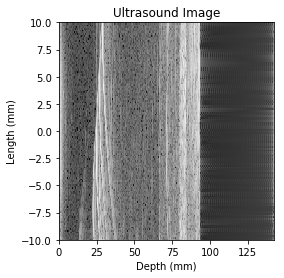

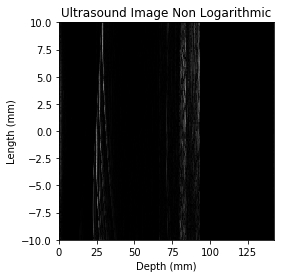

In [6]:
#Compensating
h=x*1450
ffatt=np.exp(2*4.96*h)
LinesRFC=LinesRF*ffatt
LinesRFE=hilbert(LinesRFC)
LinesRFE=abs(LinesRFE)
#images need to be logarithmic so we can see all the contrast
Mx=LinesRFE.max()
Image=20*np.log10(LinesRFE/Mx)
ImageBW=LinesRFE
#the line axis
s=np.linspace(-10,10,128)
#Plotting
d=h/2*1000  #answer: why are we doing this here?
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, Image[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(36./5)  #this is because I know the image was 20mm in lenght so 26 lines=20mm or a ratio 10/13
plt.title('Ultrasound Image')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageBW[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(36./5)
plt.title('Ultrasound Image Non Logarithmic')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

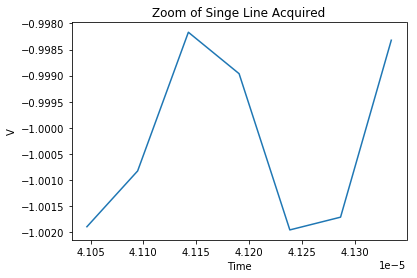

In [8]:
inx1=np.where(x>0.4103e-4)
inx1=inx1[0]
inx2=np.where(x>0.4135e-4)
inx2=inx2[0]
f = open('LabRFdata.dat','rb') 
Line = np.fromfile(f,count=-1,dtype=np.int16)
LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
plt.plot(x[inx1[0]:inx2[0]],LineF[inx1[100]:inx2[100]])
plt.title('Zoom of Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


Question 2:-
Since 1 cycles of the signal are between $0.4103\times 10^{-4}$ and $0.4123\times 10^{-4}$ we then have a frequency of $\frac{1}{(0.4123\times 10^{-4}-0.4103\times 10^{-4})/1}=4.98 MHz$

In [45]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom


RefDs = dicom.read_file('US-MONO2-8-8x-execho.dcm')
print(RefDs)

(0008, 0000) Group Length                        UL: 342
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TTE', '0001']
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID                    UI: 999.999.2.19941105.134500.2.101
(0008, 0020) Study Date                          DA: '1994.11.05'
(0008, 0023) Content Date                        DA: '1994.11.05'
(0008, 0030) Study Time                          TM: '13:45:00'
(0008, 0060) Modality                            CS: 'US'
(0008, 0070) Manufacturer                        LO: 'Acme Products'
(0008, 0090) Referring Physician's Name          PN: 'Anonymized'
(0008, 1030) Study Description                   LO: 'Exercise Echocardiogram'
(0008, 103e) Series Description                  LO: 'Post-Stress'
(0008, 2120) Stage Name                          SH: 'Post-Exercise'
(0008, 2122) Stage Number                        IS: '2'
(0008, 2124) Nu

[0, 127, 0, 119]

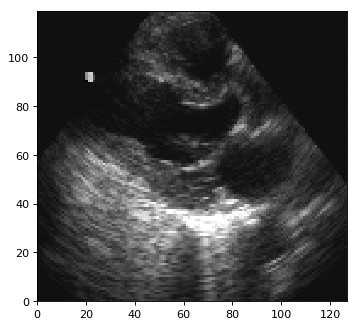

In [57]:
ConstPixelDims = (int(RefDs.NumberofFrames),int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('US-MONO2-8-8x-execho.dcm')
ArrayDicom[:,:,:]=ds.pixel_array

#plt.figure()
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') 
plt.set_cmap(plt.gray()) 
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(y, x, np.flipud(ArrayDicom[3,:,:]))
plt.axis([y.min(),y.max(),x.min(),x.max()])